In [ ]:
!pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 38.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<

In [ ]:
!pip uninstall -y pyarrow requests

Found existing installation: pyarrow 17.0.0
Uninstalling pyarrow-17.0.0:
  Successfully uninstalled pyarrow-17.0.0
Found existing installation: requests 2.32.3
Uninstalling requests-2.32.3:
  Successfully uninstalled requests-2.32.3


In [ ]:
!pip install pyarrow==15.0.0 requests==2.32.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 7.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 15.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.2 which is incompatible.


In [ ]:
!pip show pyarrow

Name: pyarrow
Version: 15.0.0
Summary: Python library for Apache Arrow
Home-page: https://arrow.apache.org/
Author: 
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy
Required-by: bigframes, cudf-cu12, datasets, db-dtypes, ibis-framework, pandas-gbq, tensorflow-datasets


In [ ]:
!pip show requests

Name: requests
Version: 2.32.2
Summary: Python HTTP for Humans.
Home-page: https://requests.readthedocs.io
Author: Kenneth Reitz
Author-email: me@kennethreitz.org
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: certifi, charset-normalizer, idna, urllib3
Required-by: bigframes, CacheControl, community, datasets, earthengine-api, fastai, folium, gcsfs, gdown, geocoder, google-api-core, google-cloud-bigquery, google-cloud-storage, google-colab, huggingface-hub, kaggle, kagglehub, moviepy, music21, pandas-datareader, panel, pooch, pymystem3, requests-oauthlib, spacy, Sphinx, tensorboard, tensorflow-datasets, torchtext, transformers, tweepy, weasel, yfinance


In [ ]:
!pip install -q git+https://github.com/huggingface/peft.git transformers bitsandbytes datasets

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


loading dataset

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!wget -c https://zenodo.org/records/10821435/files/train_captions.csv

--2024-07-20 14:01:30--  https://zenodo.org/records/10821435/files/train_captions.csv
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.98.238, 188.184.103.159, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10100161 (9.6M) [text/plain]
Saving to: ‘train_captions.csv’

train_captions.csv  100%[===================>]   9.63M  7.90MB/s    in 1.2s    

2024-07-20 14:01:32 (7.90 MB/s) - ‘train_captions.csv’ saved [10100161/10100161]



In [ ]:
import os
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from transformers import AutoProcessor
import torch

define CustomImageCaptioningDataset

In [3]:
import zipfile
from torch.utils.data import Dataset
from PIL import Image
import pandas as pd
import os

class CustomImageCaptioningDataset(Dataset):
    def __init__(self, zip_file_path, captions_file_path):
        self.zip_file_path = zip_file_path
        self.captions_df = pd.read_csv(captions_file_path)

        # Open the zip file and list image files
        self.archive = zipfile.ZipFile(zip_file_path, 'r')
        self.image_list = [file for file in self.archive.namelist() if file.lower().endswith(('png', 'jpg', 'jpeg'))]

        # Ensure the filenames in the CSV match those in the zip file
        self.dataset = []
        for index, row in self.captions_df.iterrows():
            img_name = row['ID']
            caption = row['Caption']
            img_file = f"train/{img_name}.jpg"  # Adjust this if your paths are different in the zip
            if img_file in self.image_list:
                self.dataset.append({
                    'image_file': img_file,
                    'caption': caption
                })

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        img_file = item['image_file']
        caption = item['caption']

        with self.archive.open(img_file) as file:
            image = Image.open(file).convert('RGB')

        return {"image": image, "text": caption}


define ImageCaptioningDataset

In [4]:
from torch.utils.data import Dataset, DataLoader

class ImageCaptioningDataset(Dataset):
    def __init__(self, dataset, processor):
        self.dataset = dataset
        self.processor = processor

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        encoding = self.processor(images=item["image"], padding="max_length", return_tensors="pt")
        # remove batch dimension
        encoding = {k: v.squeeze() for k, v in encoding.items()}
        encoding["text"] = item["text"]
        return encoding

def collate_fn(batch):
    # pad the input_ids and attention_mask
    processed_batch = {}
    for key in batch[0].keys():
        if key != "text":
            processed_batch[key] = torch.stack([example[key] for example in batch])
        else:
            text_inputs = processor.tokenizer(
                [example["text"] for example in batch], padding=True, return_tensors="pt"
            )
            processed_batch["input_ids"] = text_inputs["input_ids"]
            processed_batch["attention_mask"] = text_inputs["attention_mask"]
    return processed_batch

define the processor and model

In [ ]:
from PIL import Image
import requests
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

define lora config

In [ ]:
!pip install peft==0.3.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 2.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
from peft import LoraConfig, get_peft_model

# Let's define the LoraConfig
config = LoraConfig(
    r=16,
    lora_alpha=32,
    lora_dropout=0.05,
    bias="none",
    target_modules=["q_proj", "k_proj"]
)

model = get_peft_model(model, config)
model.print_trainable_parameters()

trainable params: 983040 || all params: 150603777 || trainable%: 0.6527326336576539


load the dataset and dataloader

--2024-07-20 17:36:53--  https://zenodo.org/records/10821435/files/train_images.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.79.172, 188.184.103.159, 188.184.98.238, ...
Connecting to zenodo.org (zenodo.org)|188.185.79.172|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4611440786 (4.3G) [application/octet-stream]
Saving to: ‘train_images.zip’

train_images.zip    100%[===================>]   4.29G  16.5MB/s    in 4m 9s   

2024-07-20 17:41:03 (17.6 MB/s) - ‘train_images.zip’ saved [4611440786/4611440786]

-rw------- 1 root root 4.3G Jul 20 17:41 train_images.zip


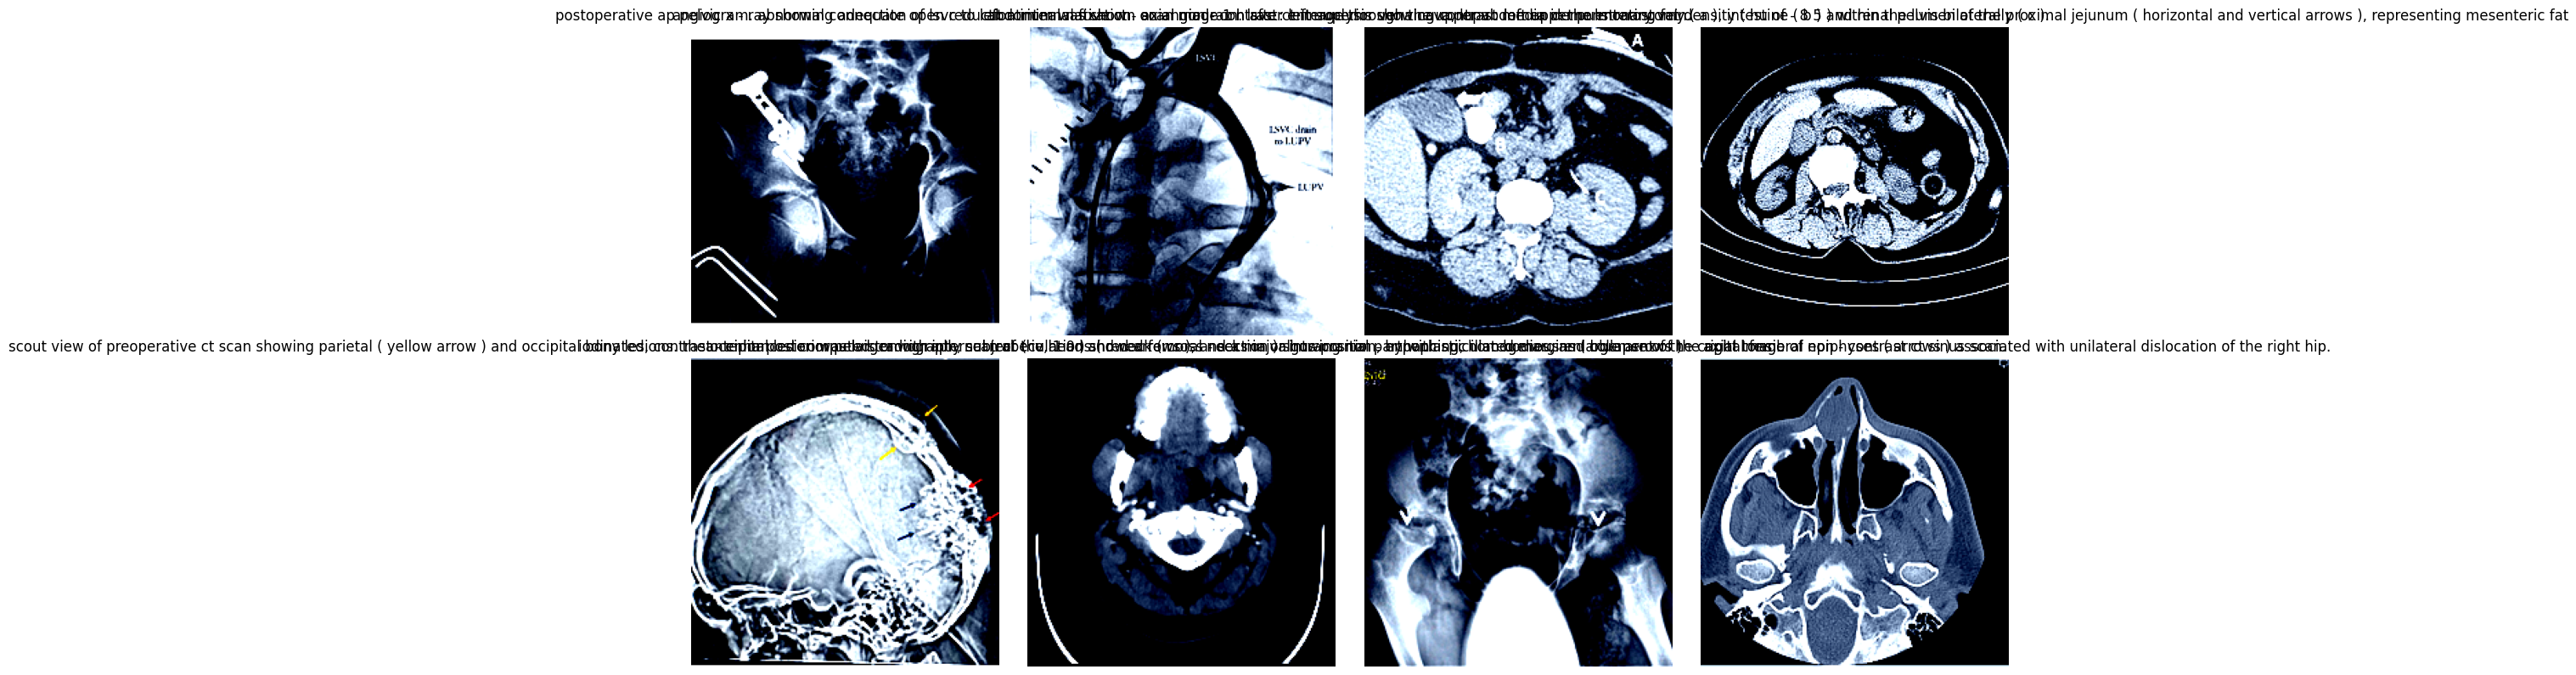

In [8]:
# Initialize the processor (replace with actual processor initialization)
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch16")  # Replace with your model name

# Download the dataset
!wget -O train_images.zip https://zenodo.org/records/10821435/files/train_images.zip?download=1

# Verify the downloaded zip file
!ls -lh train_images.zip

import zipfile
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
import matplotlib.pyplot as plt

import torch
from transformers import CLIPProcessor

class CustomImageCaptioningDataset(Dataset):
    def __init__(self, zip_file_path, captions_file_path):
        self.zip_file_path = zip_file_path
        self.captions_df = pd.read_csv(captions_file_path)

        # Open the zip file and list image files
        self.archive = zipfile.ZipFile(zip_file_path, 'r')
        self.image_list = [file for file in self.archive.namelist() if file.lower().endswith(('png', 'jpg', 'jpeg'))]

        # Ensure the filenames in the CSV match those in the zip file
        self.dataset = []
        for index, row in self.captions_df.iterrows():
            img_name = row['ID']
            caption = row['Caption']
            img_file = f"train/{img_name}.jpg"  # Adjust this if your paths are different in the zip
            if img_file in self.image_list:
                self.dataset.append({
                    'image_file': img_file,
                    'caption': caption
                })

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        item = self.dataset[idx]
        img_file = item['image_file']
        caption = item['caption']

        with self.archive.open(img_file) as file:
            image = Image.open(file).convert('RGB')

        return {"image": image, "text": caption}

# Path to your zip file and captions file
zip_file_path = "train_images.zip"
captions_file_path = '/content/drive/MyDrive/train_captions.csv'

# Create the CustomImageCaptioningDataset
custom_dataset = CustomImageCaptioningDataset(zip_file_path, captions_file_path)

# Use the custom dataset with your ImageCaptioningDataset class
image_captioning_dataset = ImageCaptioningDataset(custom_dataset, processor)

# Create DataLoader
train_loader = DataLoader(image_captioning_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Example of getting a batch and showing images with captions
batch = next(iter(train_loader))

# Function to show images and print their captions
def show_images_with_captions(batch, rows):
    num_images = len(batch["input_ids"])
    cols = (num_images + rows - 1) // rows  # Calculate the number of columns

    plt.figure(figsize=(cols * 4, rows * 4))

    for i in range(num_images):
        img_tensor = batch["pixel_values"][i]
        img = img_tensor.permute(1, 2, 0).numpy()  # Convert tensor to numpy array
        caption = processor.tokenizer.decode(batch["input_ids"][i], skip_special_tokens=True)
        plt.subplot(rows, cols, i+1)
        plt.imshow(img)
        plt.title(caption)  # Show the caption as the title
        plt.axis('off')  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

# Show images with captions
show_images_with_captions(batch, 2)


define collate_fn

In [11]:
from transformers import CLIPProcessor

processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

def collate_fn(batch):
    images = [item["image"] for item in batch]
    texts = [item["text"] for item in batch]

    # Process images and texts using the processor
    inputs = processor(text=texts, images=images, return_tensors="pt", padding=True)

    return {
        "input_ids": inputs["input_ids"],
        "attention_mask": inputs["attention_mask"],
        "pixel_values": inputs["pixel_values"]
    }


In [ ]:
import torch
from transformers import CLIPModel, AdamW, get_linear_schedule_with_warmup
import os

# Initialize dataset and dataloader
zip_file_path = "train_images.zip"
captions_file_path = '/content/drive/MyDrive/train_captions.csv'
custom_dataset = CustomImageCaptioningDataset(zip_file_path, captions_file_path)
train_loader = DataLoader(custom_dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

# Initialize model and optimizer
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")

old_position_embedding = model.text_model.embeddings.position_embedding
num_position_embeddings = old_position_embedding.num_embeddings
#embedding_dim = old_position_embedding.embedding_dim
#new_position_embedding = torch.nn.Embedding(num_position_embeddings * 2, embedding_dim)  # Double the possible positions
#new_position_embedding.to(device)  # Move to the same device as the model
#model.text_model.embeddings.position_embedding = new_position_embedding

optimizer = AdamW(model.parameters(), lr=1e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

num_epochs = 3
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

# Contrastive loss function
def contrastive_loss(logits_per_image, logits_per_text):
    batch_size = logits_per_image.size(0)
    labels = torch.arange(batch_size, device=logits_per_image.device)
    loss_img = torch.nn.functional.cross_entropy(logits_per_image, labels)
    loss_text = torch.nn.functional.cross_entropy(logits_per_text, labels)
    return (loss_img + loss_text) / 2

# Training loop with debug prints
model.train()
save_directory = "/content/gdrive/MyDrive/final"

for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}/{num_epochs}")
    for idx, batch in enumerate(train_loader):
        #input_ids = batch["input_ids"].to(device)
        #attention_mask = batch["attention_mask"].to(device)
        input_ids = input_ids[:, :num_position_embeddings]
        attention_mask = attention_mask[:, :num_position_embeddings]
        #pixel_values = batch["pixel_values"].to(device)

        #print(f"Batch {idx+1}: input_ids shape: {input_ids.shape}, pixel_values shape: {pixel_values.shape}")

        #if input_ids.size(0) != pixel_values.size(0):
            #raise ValueError(f"Batch size mismatch: input_ids size {input_ids.size(0)} != pixel_values size {pixel_values.size(0)}")

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        loss = contrastive_loss(logits_per_image, logits_per_text)

        print(f"Batch {idx+1}/{len(train_loader)}, Loss: {loss.item()}")

        loss.backward()

        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    # Save the model at the end of each epoch
    epoch_save_path = os.path.join(save_directory, f"model_epoch_{epoch+1}")
    model.save_pretrained(epoch_save_path)
    processor.save_pretrained(epoch_save_path)

# Save the model at the end of training
final_save_path = os.path.join(save_directory, "final_model")
model.save_pretrained(final_save_path)
processor.save_pretrained(final_save_path)


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Batch 6146/7495, Loss: 0.41197967529296875
Batch 6147/7495, Loss: 0.41197964549064636
Batch 6148/7495, Loss: 0.41197964549064636
Batch 6149/7495, Loss: 0.41197967529296875
Batch 6150/7495, Loss: 0.41197967529296875
Batch 6151/7495, Loss: 0.41197967529296875
Batch 6152/7495, Loss: 0.41197967529296875
Batch 6153/7495, Loss: 0.4119797348976135
Batch 6154/7495, Loss: 0.4119797348976135
Batch 6155/7495, Loss: 0.4119797646999359
Batch 6156/7495, Loss: 0.4119797945022583
Batch 6157/7495, Loss: 0.4119798541069031
Batch 6158/7495, Loss: 0.41197988390922546
Batch 6159/7495, Loss: 0.41197991371154785
Batch 6160/7495, Loss: 0.4119799733161926
Batch 6161/7495, Loss: 0.4119800329208374
Batch 6162/7495, Loss: 0.4119800925254822
Batch 6163/7495, Loss: 0.41198012232780457
Batch 6164/7495, Loss: 0.41198015213012695
Batch 6165/7495, Loss: 0.41198012232780457
Batch 6166/7495, Loss: 0.4119800925254822
Batch 6167/7495, Loss: 0.4119799733161926
Batch 6168/74

#reduce the runtime

Small and Quantized Model Selection

In [5]:
!pip install --upgrade torch torchvision torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [7]:
!pip install bitsandbytes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 4.8 MB/s eta 0:00:00


In [ ]:
from transformers import CLIPModel, BitsAndBytesConfig
import torch

# Configuration for loading the model in 4-bit mode
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=False,
    bnb_4bit_compute_dtype=torch.float16
)

# Load the model with the quantization configuration
model = CLIPModel.from_pretrained(
    "openai/clip-vit-base-patch16",
    quantization_config=bnb_config,
    device_map="auto"
)


initializing the dataloader

In [ ]:
from torch.utils.data import DataLoader, Subset

# Training settings
batch_size = 16
subset_size = 1000  # Use a smaller subset of the dataset for quick experiments
zip_file_path = "train_images.zip"
captions_file_path = '/content/drive/MyDrive/train_captions.csv'

custom_dataset = CustomImageCaptioningDataset(zip_file_path, captions_file_path)
subset_dataset = Subset(custom_dataset, range(subset_size))
train_loader = DataLoader(subset_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)


Seting up the optimizer and scheduler

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(), lr=1e-4)
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
num_epochs = 1
total_steps = len(train_loader) * num_epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)


Define the Loss Function

In [ ]:
def contrastive_loss(logits_per_image, logits_per_text):
    batch_size = logits_per_image.size(0)
    labels = torch.arange(batch_size, device=logits_per_image.device)
    loss_img = torch.nn.functional.cross_entropy(logits_per_image, labels)
    loss_text = torch.nn.functional.cross_entropy(logits_per_text, labels)
    return (loss_img + loss_text) / 2

Training

In [ ]:
import os

# Training loop
model.train()
save_directory = "/content/gdrive/MyDrive/final"

for epoch in range(num_epochs):
    print(f"Epoch: {epoch+1}/{num_epochs}")
    for idx, batch in enumerate(train_loader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        pixel_values = batch["pixel_values"].to(device)

        if input_ids.size(0) != pixel_values.size(0):
            raise ValueError(f"Batch size mismatch: input_ids size {input_ids.size(0)} != pixel_values size {pixel_values.size(0)}")

        outputs = model(input_ids=input_ids, pixel_values=pixel_values, attention_mask=attention_mask)
        logits_per_image = outputs.logits_per_image
        logits_per_text = outputs.logits_per_text

        loss = contrastive_loss(logits_per_image, logits_per_text)
        print(f"Batch {idx+1}/{len(train_loader)}, Loss: {loss.item()}")

        loss.backward()
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

        # Empty cache every few iterations to free up memory
        if idx % 10 == 0:
            torch.cuda.empty_cache()

    # Save the model at the end of each epoch
    epoch_save_path = os.path.join(save_directory, f"model_epoch_{epoch+1}")
    model.save_pretrained(epoch_save_path)
    processor.save_pretrained(epoch_save_path)

# Save the model at the end of training
final_save_path = os.path.join(save_directory, "final_model")
model.save_pretrained(final_save_path)
processor.save_pretrained(final_save_path)
